#### Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -

1. Draw plots to demonstrate the analysis for the following questions and better visualizations

2. Write code comments wherever required for code understanding

Insights to be drawn -

● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.

● Get all the episode names, whose average rating is more than 8 for every season

● Get all the episode names that aired before May 2019

● Get the episode name from each season with the highest and lowest rating

● Get the summary for the most popular ( ratings ) episode in every season

In [22]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:

# Define the URL
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the URL and retrieve the data
response = requests.get(url)
data = response.json()

# Extract the show name and episodes from the data
show_name = data["name"]
episodes = data["_embedded"]["episodes"]

# Create an empty list to store the episode dataframes
episode_dfs = []

# Iterate over each episode and extract the relevant information
for episode in episodes:
    episode_id = episode["id"]
    episode_url = episode["url"]
    episode_name = episode["name"]
    season_number = episode["season"]
    episode_number = episode["number"]
    episode_type = episode["type"]
    airdate = episode["airdate"]
    airtime = episode["airtime"]
    runtime = episode["runtime"]
    average_rating = episode["rating"]["average"]
    summary = episode["summary"]
    medium_image_link = episode["image"]["medium"]
    original_image_link = episode["image"]["original"]

    # Remove HTML tags from the summary
    summary = summary.replace("<p>", "").replace("</p>", "")

    # Create a dictionary for the current episode
    episode_data = {
    "id": [episode_id],
    "url": [episode_url],
    "episode_name": [episode_name],
    "season": [season_number],
    "episode_number": [episode_number],
    "type": [episode_type],
    "airdate": [airdate],
    "airtime": [airtime],
    "runtime": [runtime],
    "average_rating": [average_rating],
    "summary": [summary],
    "medium_image_link": [medium_image_link],
    "original_image_link": [original_image_link]
}

    # Create a dataframe for the current episode
    episode_df = pd.DataFrame(episode_data)

    # Append the dataframe to the list
    episode_dfs.append(episode_df)

# Concatenate all episode dataframes into a single dataframe
df = pd.concat(episode_dfs, ignore_index=True)

# Perform further analysis using the dataframe
# ...


In [24]:
df.head()

,id,url,episode_name,season,episode_number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


### Insights

#### ● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [25]:
#Get how many seasons are there 
df["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [26]:
for season in range(1, 5):
    df_season = df[df["season"] == season]
    overall_rating_season = df_season["average_rating"].sum() / len(df_season)
    print(f"Season {season} has an overall rating of {round(overall_rating_season, 2)}")


Season 1 has an overall rating of 8.09
Season 2 has an overall rating of 8.0
Season 3 has an overall rating of 7.78
Season 4 has an overall rating of 7.54


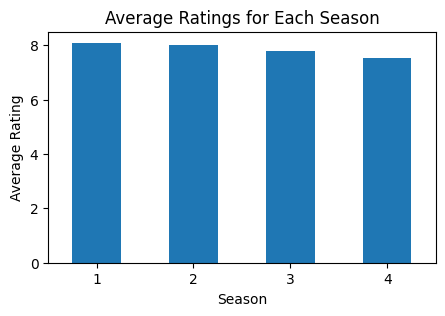

In [27]:
# Group the data by season and calculate the average rating for each season
season_ratings = df.groupby('season')['average_rating'].mean()

# Create a bar plot to compare the ratings across seasons
plt.figure(figsize=(5,3))  # Adjust the figure size as per your preference
season_ratings.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Season')
plt.xticks(rotation=0)
plt.show()

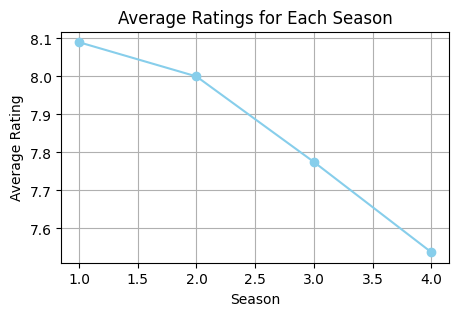

In [28]:
plt.figure(figsize=(5, 3))
season_ratings.plot(marker='o', linestyle='-', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Season')
plt.grid(True)
plt.show()

#### ● Get all the episode names, whose average rating is more than 8 for every season

In [29]:
# Filter the dataframe to include episodes with average rating > 8 for each season
filtered_df = df[df['average_rating'] > 8]

# Group the filtered dataframe by season and aggregate the episode names
episode_names = filtered_df.groupby('season')['episode_name'].apply(list)

# Display the episode names for each season
for season, episodes in episode_names.items():
    print(f"Season {season} episodes with average rating > 8:")
    for episode in episodes:
        print(episode)
    print()

Season 1 episodes with average rating > 8:
Trompe L'Oeil
The Well-Tempered Clavier
The Bicameral Mind

Season 2 episodes with average rating > 8:
Kiksuya
Vanishing Point
The Passenger



In [30]:
# Define the minimum average rating threshold
min_rating_threshold = 8

# Filter the dataframe to include episodes with average rating > min_rating_threshold for each season
filtered_df = df[df['average_rating'] > min_rating_threshold]

# Group the filtered dataframe by season and aggregate the episode names
episode_names = filtered_df.groupby('season')['episode_name'].apply(list)

# Calculate the number of episodes with average rating > min_rating_threshold in each season
num_episodes = filtered_df.groupby('season').size()

# Display the episode names and number of episodes for each season
for season, episodes in episode_names.items():
    print(f"Season {season} episodes with average rating > {min_rating_threshold}:")
    for episode in episodes:
        print(episode)
    print()
    
for season, num in num_episodes.items():
    print(f"Season {season} number of episodes with average rating > {min_rating_threshold}: {num}")


Season 1 episodes with average rating > 8:
Trompe L'Oeil
The Well-Tempered Clavier
The Bicameral Mind

Season 2 episodes with average rating > 8:
Kiksuya
Vanishing Point
The Passenger

Season 1 number of episodes with average rating > 8: 3
Season 2 number of episodes with average rating > 8: 3


#### ● Get all the episode names that aired before May 2019

In [31]:
# Convert the airdate column to datetime format
df["airdate"] = pd.to_datetime(df["airdate"])

# Filter the data to find episodes aired before May 2019
filtered_episodes = [episode for episode, airdate in zip(df['episode_name'], df['airdate']) if airdate < pd.Timestamp('2019-05-01')]

# Display the episode names
for episode in filtered_episodes:
    print(episode)


The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger


#### ● Get the summary for the most popular ( ratings ) episode in every season

In [32]:
# Group the dataframe by season and find the episode with the highest rating in each season
highest_episodes = df.groupby('season').apply(lambda x: x.loc[x['average_rating'].idxmax()])

# Group the dataframe by season and find the episode with the lowest rating in each season
lowest_episodes = df.groupby('season').apply(lambda x: x.loc[x['average_rating'].idxmin()])

# Display the episode names with the highest and lowest ratings for each season
for season in df['season'].unique():
    highest_rating_episode = highest_episodes[highest_episodes['season'] == season]
    lowest_rating_episode = lowest_episodes[lowest_episodes['season'] == season]

    print(f"Season {season}:")
    print(f"Highest Rating Episode: {highest_rating_episode['episode_number'].values[0]} - {highest_rating_episode['episode_name'].values[0]}")
    print(f"Lowest Rating Episode: {lowest_rating_episode['episode_number'].values[0]} - {lowest_rating_episode['episode_name'].values[0]}")
    print()


Season 1:
Highest Rating Episode: 10 - The Bicameral Mind
Lowest Rating Episode: 3 - The Stray

Season 2:
Highest Rating Episode: 8 - Kiksuya
Lowest Rating Episode: 5 - Akane No Mai

Season 3:
Highest Rating Episode: 1 - Parce Domine
Lowest Rating Episode: 6 - Decoherence

Season 4:
Highest Rating Episode: 5 - Zhuangzi
Lowest Rating Episode: 1 - The Auguries



#### ● Get the summary for the most popular ( ratings ) episode in every season

In [33]:
# Retrieve the summaries for the most popular episode in each season
episode_summaries = df.groupby('season').apply(lambda x: x.loc[x['average_rating'].idxmax(), ['season', 'episode_number', 'episode_name', 'summary']])

# Display the summaries for the most popular episode in each season
for _, row in episode_summaries.iterrows():
    season = row['season']
    episode_number = row['episode_number']
    episode_name = row['episode_name']
    summary = row['summary']

    print(f"Season {season} - Episode {episode_number}: {episode_name}")
    print(f"Summary: {summary}")
    print()


Season 1 - Episode 10: The Bicameral Mind
Summary: Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.

Season 2 - Episode 8: Kiksuya
Summary: Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.

Season 3 - Episode 1: Parce Domine
Summary: If you're stuck in a loop, try walking in a straight line.

Season 4 - Episode 5: Zhuangzi
Summary: God is bored.

